# `Using TensorFlow like NumPy`
* TensorFlow can be used in a way similar to NumPy for numerical computations, array manipulations, and mathematical operations. 
* TensorFlow like NumPy allows you to benefit from TensorFlow's powerful features such as `automatic differentiation`, `GPU acceleration`, `distributed computing`, and seamless integration with `deep learning frameworks`. This approach is ideal for scientific computing and building complex machine learning models.

## Tensors and operations

* In TensorFlow, `tensors` are fundamental objects that represent data in the computation graph. They flow through operations, allowing for efficient computation and differentiation.

* Tensors are central to TensorFlow's design, enabling efficient and scalable computation in deep learning models. By understanding how to create and manipulate tensors, you can effectively work with TensorFlow's API to build and train sophisticated machine learning models.

* These tensors will be important when we create `custom cost functions`, `custom metrics`, `custom layers`, and more, so let’s see how to create and manipulate them.

### 1. Creating Tensors
* You can create tensors in TensorFlow just like NumPy arrays:

In [2]:
import tensorflow as tf

# Create a constant tensor (Immutable:)
a = tf.constant([[1.0, 2.0], [3.0, 4.0]])

# Create a variable tensor (can be updated)
b = tf.Variable([[1.0, 2.0], [3.0, 4.0]])

# Accessing shape, dtype, and ndim
tensor = tf.constant([[1, 2], [3, 4]])
# shape: Attribute that returns the shape of the tensor.
print(tensor.shape)  # Output: (2, 2)
# dtype: Attribute that returns the data type of the tensor.
print(tensor.dtype)  # Output: <dtype: 'int32'>
# ndim: Method that returns the number of dimensions (or rank) of the tensor.
print(tensor.ndim)  # Output: 2

# Create tensors with specified shape and dtype
zeros_tensor = tf.zeros((3, 3), dtype=tf.float32)
ones_tensor = tf.ones((2, 2), dtype=tf.int32)
random_tensor = tf.random.normal((3, 3), mean=0.0, stddev=1.0, dtype=tf.float32)

(2, 2)
<dtype: 'int32'>
2


### 2. Indexing
* Indexing refers to accessing individual elements within a tensor using specific indices :

In [3]:
import tensorflow as tf

# Define a 2D tensor
tensor_2d = tf.constant([[1, 2, 3],
                          [4, 5, 6]])

# Accessing individual elements
print(tensor_2d[0, 0])  # Output: 1
print(tensor_2d[1, 2])  # Output: 6

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### 3. Slicing
* Slicing allows you to extract sub-tensors (slices) from a larger tensor based on specific ranges of indices along each dimension.

In [4]:
import tensorflow as tf

# Slicing along rows and columns
print(tensor_2d[0, :])  # Slice the first row: [1, 2, 3]
print(tensor_2d[:, 1])  # Slice the second column: [2, 5, 8]

# Slicing sub-tensors
print(tensor_2d[1:, :2])  # Slice rows from index 1 onwards and columns up to index 2:
                          # [[4, 5],
                          #  [7, 8]]

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([2 5], shape=(2,), dtype=int32)
tf.Tensor([[4 5]], shape=(1, 2), dtype=int32)


In [5]:
import tensorflow as tf

# Define a 3D tensor (3x3x3)
tensor_3d = tf.Variable([
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]],

    [[10, 11, 12],
     [13, 14, 15],
     [16, 17, 18]],

    [[19, 20, 21],
     [22, 23, 24],
     [25, 26, 27]]
])

# Slicing along different dimensions
print(tensor_3d[1, :, :])  # Slice the entire 2nd 'layer' (2nd matrix)
print(tensor_3d[:, 1, 1])  # Slice the (1, 1) element from each 'layer'
print(tensor_3d[0:2, :, 0])  # Slice the first two 'layers' and extract the first column

tf.Tensor(
[[10 11 12]
 [13 14 15]
 [16 17 18]], shape=(3, 3), dtype=int32)
tf.Tensor([ 5 14 23], shape=(3,), dtype=int32)
tf.Tensor(
[[ 1  4  7]
 [10 13 16]], shape=(2, 3), dtype=int32)


### 4. Modification of elements
* The tensorflow does not support item assignment occurs when you attempt to directly modify an individual element of a TensorFlow tensor.

### 4.1 Mutability and In-Place Modification
* One of the main features of tf.Variable is its mutability. 
* You can modify the value of a variable using the `assign()`, `assign_add()`, or `assign_sub()` methods.

In [6]:
import tensorflow as tf

# Create a TensorFlow variable initialized with a scalar value
var = tf.Variable(5.0)

# Example: Using assign() to set a new value
new_value = 10.0
var.assign(new_value)

print("After assign(new_value):", var.numpy())  # Output: 10.0

# Example: Using assign_add() to increment the variable
increment_by = 2.0
var.assign_add(increment_by)

print("After assign_add(increment_by):", var.numpy())  # Output: 12.0

# Example: Using assign_sub() to decrement the variable
decrement_by = 3.0
var.assign_sub(decrement_by)

print("After assign_sub(decrement_by):", var.numpy())  # Output: 9.0

After assign(new_value): 10.0
After assign_add(increment_by): 12.0
After assign_sub(decrement_by): 9.0


### 4.2 Modifying Individual Elements
* You can modify individual elements (or slices) of a tf.Variable using the `assign()` method on specific indices or slices.
* Direct item assignment `(var[0] = value)` does `not work` on tf.Variable objects.

In [7]:
import tensorflow as tf

# Create a tf.Variable
var = tf.Variable([1, 2, 3, 4])

# Modify individual elements using assign() method
var[1].assign(5)  # Modify the second element to 5
print(var.numpy())  # Output: [1, 5, 3, 4]

# Modify range of elements using assign() method
var[1:3].assign(3)  # Modify the second element to 5
print(var.numpy())  # Output: [1, 5, 3, 4]


[1 5 3 4]
[1 3 3 4]


### 4.3 Advanced Modification with `scatter_nd_update()`
* TensorFlow provides advanced method like `scatter_nd_update()` to modify specific elements or slices of a variable based on indices.
* These methods are useful for updating variable values in a more complex and efficient manner.

In [8]:
import tensorflow as tf

# Create a TensorFlow variable initialized with zeros
var = tf.Variable([0.0, 0.0, 0.0, 0.0])

# Define sparse indices and updates
indices_sparse = tf.constant([[1], [3]])  # Define sparse indices as a 2D tensor
updates_sparse = tf.constant([5.0, 7.0])  # Define corresponding sparse updates

# Perform sparse scatter_nd_update
updated_var = tf.tensor_scatter_nd_update(var, indices_sparse, updates_sparse)

print("After scatter_nd_update(indices_sparse, updates_sparse):", updated_var.numpy())
# Output: [0.0, 5.0, 0.0, 7.0]

After scatter_nd_update(indices_sparse, updates_sparse): [0. 5. 0. 7.]


In [9]:
import tensorflow as tf

# Create a TensorFlow variable initialized with zeros (2D tensor)
var = tf.Variable([[0.0, 0.0, 0.0],
                   [0.0, 0.0, 0.0],
                   [0.0, 0.0, 0.0]])

# Define sparse indices and updates for a 2D tensor
indices_sparse = tf.constant([[0, 1],   # Update element at row 0, column 1
                              [1, 2]])  # Update element at row 1, column 2

updates_sparse = tf.constant([5.0, 7.0])  # Corresponding sparse update values

# Perform sparse scatter_nd_update on the 2D tensor
updated_var = tf.tensor_scatter_nd_update(var, indices_sparse, updates_sparse)

print("After scatter_nd_update(indices_sparse, updates_sparse):")
print(updated_var.numpy())


After scatter_nd_update(indices_sparse, updates_sparse):
[[0. 5. 0.]
 [0. 0. 7.]
 [0. 0. 0.]]


In [10]:
import tensorflow as tf

# Create a TensorFlow variable initialized with zeros (2D tensor: 3x4 matrix)
var = tf.Variable([[0.0, 0.0, 0.0, 0.0],
                   [0.0, 0.0, 0.0, 0.0],
                   [0.0, 0.0, 0.0, 0.0]])

# Define the range of row and column indices to update (slicing)
start_row = 1
end_row = 3
start_col = 1
end_col = 4

# Generate new values for the specified range (2D tensor: corresponding submatrix)
new_values = tf.constant([[5.0, 7.0, 3.0],
                          [1.0, 2.0, 4.0]])

# Calculate the dimensions of the new values tensor
num_rows, num_cols = new_values.shape

# Generate indices for the range to update using meshgrid and stack
rows, cols = tf.meshgrid(tf.range(start_row, end_row), tf.range(start_col, end_col), indexing='ij')
indices_sparse = tf.stack([rows, cols], axis=-1)

# Perform sparse scatter_nd_update to modify the specified submatrix range
updated_var = tf.tensor_scatter_nd_update(var, indices_sparse, new_values)

print("After modifying the range of elements:")
print(updated_var.numpy())

After modifying the range of elements:
[[0. 0. 0. 0.]
 [0. 5. 7. 3.]
 [0. 1. 2. 4.]]


### 5. Array Manipulation

In [11]:
# .reshape():
# .reshape() is used to change the shape of a tensor while keeping the same underlying data.

import tensorflow as tf

# Create a tensor
x = tf.constant([[1, 2],
                 [3, 4]])

# Reshape the tensor to a new shape
x_reshaped = tf.reshape(x, [1, 4])  # Reshape to shape (1, 4)
print(x_reshaped)

tf.Tensor([[1 2 3 4]], shape=(1, 4), dtype=int32)


In [12]:
# tf.squeeze():
# This function removes dimensions of size 1 from the shape of a tensor.

import tensorflow as tf

# Create a tensor with shape (1, 3, 1)
x = tf.constant([[[1], [2], [3]]])

# Squeeze the tensor to remove dimensions of size 1
x_squeezed = tf.squeeze(x)
print(x_squeezed)  # Output shape will be (3,)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [13]:
# tile():
# tf.tile() is used to construct a new tensor by tiling the input tensor.
# It replicates the input tensor's data along specified dimensions.

import tensorflow as tf

# Create a tensor
x = tf.constant([[1, 2],
                 [3, 4]])

# Tile the tensor along rows and columns
x_tiled = tf.tile(x, [2, 3])  # Tile to (2, 3) replication
print(x_tiled)

tf.Tensor(
[[1 2 1 2 1 2]
 [3 4 3 4 3 4]
 [1 2 1 2 1 2]
 [3 4 3 4 3 4]], shape=(4, 6), dtype=int32)


### 6. Arithmetic Operations

In [14]:
import tensorflow as tf

# Define a 2D tensor (3x3)
tensor_a = tf.random.normal((3, 3), mean=0.0, stddev=1.0, dtype=tf.float32)
tensor_b = tf.random.normal((3, 3), mean=0.0, stddev=1.0, dtype=tf.float32)

# Addition: Element-wise addition of two tensors.
result = tf.add(tensor_a, tensor_b)
result = tensor_a.__add__(tensor_b)
result = tensor_a + tensor_b
# Subtraction: Element-wise subtraction of two tensors.
result = tf.subtract(tensor_a, tensor_b)
# Multiplication: Element-wise multiplication of two tensors.
result = tf.multiply(tensor_a, tensor_b)
# Division: Element-wise division of two tensors.
result = tf.divide(tensor_a, tensor_b)
# Exponentiation: Element-wise exponentiation of a tensor.
exponent = 2
result = tf.pow(tensor_a, exponent)

### 7. Broadcasting Basics
* Broadcasting is a technique used in TensorFlow to perform `element-wise operations` on tensors of different shapes by implicitly aligning their dimensions. The main concept is to extend (or "broadcast") smaller tensors to match the shape of larger tensors before applying element-wise operations.

In [15]:
# Example 1: Broadcasting Scalars
import tensorflow as tf

# Define a tensor with shape (2, 3)
tensor_a = tf.constant([[1, 2, 3],
                         [4, 5, 6]])

# Define a scalar value
scalar_b = tf.constant(2)

# Element-wise multiplication using broadcasting
result = tensor_a * scalar_b

# Display the result
print(result.numpy())

[[ 2  4  6]
 [ 8 10 12]]


In [16]:
# Example 2: Broadcasting Vectors
import tensorflow as tf

# Define a matrix with shape (2, 3)
matrix_a = tf.constant([[1, 2, 3],
                        [4, 5, 6]])

# Define a vector with shape (3,)
vector_b = tf.constant([10, 20, 30])

# Element-wise addition using broadcasting
result = matrix_a + vector_b

# Display the result
print(result.numpy())

[[11 22 33]
 [14 25 36]]


In [17]:
# Example 3: Broadcasting Along Different Axes
import tensorflow as tf

# Define a matrix with shape (2, 3)
matrix_a = tf.constant([[1, 2, 3],
                        [4, 5, 6]])

# Define a vector with shape (2,)
vector_c = tf.constant([10, 20])

# Element-wise multiplication using broadcasting along different axes
result = matrix_a * vector_c[:, tf.newaxis]

# Display the result
print(result.numpy())

[[ 10  20  30]
 [ 80 100 120]]


### 8. Reduction operations
* Reduction operations in TensorFlow are used to compute aggregate values (e.g., sum, mean, maximum, minimum) over specific dimensions of a tensor, resulting in a tensor with reduced dimensions or a scalar value. 

In [18]:
# 1. tf.reduce_sum

import tensorflow as tf

# Define a tensor
tensor = tf.constant([[1, 2, 3],
                       [4, 5, 6]])

# Compute sum along axis 0 (sum of each column)
sum_along_axis0 = tf.reduce_sum(tensor, axis=0)

# Compute sum along axis 1 (sum of each row)
sum_along_axis1 = tf.reduce_sum(tensor, axis=1)

print("Sum along axis 0:", sum_along_axis0.numpy())  # Output: [5 7 9]
print("Sum along axis 1:", sum_along_axis1.numpy())  # Output: [ 6 15]

Sum along axis 0: [5 7 9]
Sum along axis 1: [ 6 15]


In [19]:
# 2. tf.reduce_mean
import tensorflow as tf

# Define a tensor
tensor = tf.constant([[1, 2, 3],
                       [4, 5, 6]])

# Compute mean along axis 0 (mean of each column)
mean_along_axis0 = tf.reduce_mean(tensor, axis=0)

# Compute mean along axis 1 (mean of each row)
mean_along_axis1 = tf.reduce_mean(tensor, axis=1)

print("Mean along axis 0:", mean_along_axis0.numpy())  # Output: [2.5 3.5 4.5]
print("Mean along axis 1:", mean_along_axis1.numpy())  # Output: [2. 5.]

Mean along axis 0: [2 3 4]
Mean along axis 1: [2 5]


In [20]:
# 3. tf.reduce_max and tf.reduce_min
import tensorflow as tf

# Define a tensor
tensor = tf.constant([[1, 2, 3],
                       [4, 5, 6]])

# Compute maximum along axis 0 (maximum of each column)
max_along_axis0 = tf.reduce_max(tensor, axis=0)

# Compute minimum along axis 1 (minimum of each row)
min_along_axis1 = tf.reduce_min(tensor, axis=1)

print("Maximum along axis 0:", max_along_axis0.numpy())  # Output: [4 5 6]
print("Minimum along axis 1:", min_along_axis1.numpy())  # Output: [1 4]

Maximum along axis 0: [4 5 6]
Minimum along axis 1: [1 4]


In [21]:
# 4. tf.math.reduce_std
import tensorflow as tf

# Define a tensor
tensor = tf.constant([[1.0, 2.0, 3.0],
                       [4.0, 5.0, 6.0]])

# Compute the standard deviation across all elements
std_all = tf.math.reduce_std(tensor)

# Compute the standard deviation along axis 0 (column-wise)
std_axis0 = tf.math.reduce_std(tensor, axis=0)

# Compute the standard deviation along axis 1 (row-wise)
std_axis1 = tf.math.reduce_std(tensor, axis=1)

print("Standard Deviation (all elements):", std_all.numpy())
print("Standard Deviation along axis 0 (column-wise):", std_axis0.numpy())
print("Standard Deviation along axis 1 (row-wise):", std_axis1.numpy())

Standard Deviation (all elements): 1.7078252
Standard Deviation along axis 0 (column-wise): [1.5 1.5 1.5]
Standard Deviation along axis 1 (row-wise): [0.8164966 0.8164966]


### 9. Basic Mathematical Functions

In [22]:
import tensorflow as tf

# Define a 2D tensor (3x3)
tensor = tf.random.normal((3, 3), mean=0.0, stddev=1.0, dtype=tf.float32)

# Square Root: Element-wise square root of a tensor.
result = tf.sqrt(tensor)
# Absolute Value: Element-wise absolute value of a tensor.
result = tf.abs(tensor)
# Negative: Element-wise negation of a tensor.
result = tf.negative(tensor)
# Sine, Cosine, Tangent: Element-wise trigonometric functions.
result_sin = tf.sin(tensor)
result_cos = tf.cos(tensor)
result_tan = tf.tan(tensor)

### 10. Matrix Operations

In [23]:
# Multiplication of the tensors
import tensorflow as tf

# Matrix multiplication
mat1 = tf.constant([[1, 2], [3, 4]])
mat2 = tf.constant([[5, 6], [7, 8]])
mat_mult = tf.matmul(mat1, mat2)


# Perform matrix multiplication using the @ operator
mat_mult = mat1 @ mat2  # This is equivalent to tf.matmul(mat1, mat2)

In [24]:
# Transpose of a tensor
import tensorflow as tf

# Create a tensor with shape (2, 3)
x = tf.constant([[1, 2, 3],
                 [4, 5, 6]])

# Transpose the tensor
x_transposed = tf.transpose(x)  # By default, this swaps the first and second dimensions

print("Original tensor:")
print(x)
print("Transposed tensor:")
print(x_transposed)


Original tensor:
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
Transposed tensor:
tf.Tensor(
[[1 4]
 [2 5]
 [3 6]], shape=(3, 2), dtype=int32)


In [25]:
# Inverse of a tensor
import tensorflow as tf

# Create a square matrix (2x2) as a TensorFlow constant
A = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])

# Compute the inverse of the matrix A
A_inverse = tf.linalg.inv(A)

# Print the original matrix and its inverse
print("Original matrix A:")
print(A)

print("Inverse of matrix A:")
print(A_inverse)

Original matrix A:
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
Inverse of matrix A:
tf.Tensor(
[[-2.0000002   1.0000001 ]
 [ 1.5000001  -0.50000006]], shape=(2, 2), dtype=float32)


### 11. Comparison Operations

In [26]:
import tensorflow as tf

# Define a 2D tensor (3x3)
tensor_a = tf.random.normal((3, 3), mean=0.0, stddev=1.0, dtype=tf.float32)
tensor_b = tf.random.normal((3, 3), mean=0.0, stddev=1.0, dtype=tf.float32)

# Create condition_a and condition_b boolean tensors
condition_a = tf.constant([True, False, True])   # Example boolean tensor 1
condition_b = tf.constant([False, True, True])   # Example boolean tensor 2

# Equal: Element-wise equality comparison of two tensors.
result = tf.equal(tensor_a, tensor_b)
# Not Equal: Element-wise inequality comparison of two tensors.
result = tf.not_equal(tensor_a, tensor_b)
# Greater Than, Less Than: Element-wise comparison of two tensors.
result_gt = tf.greater(tensor_a, tensor_b)
result_lt = tf.less(tensor_a, tensor_b)
# Logical AND, OR: Element-wise logical operations.
result_and = tf.logical_and(condition_a, condition_b)
result_or = tf.logical_or(condition_a, condition_b)

### 12. Clipping and Normalization

In [27]:
import tensorflow as tf

# Define a tensor with values
tensor = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0])

# Clip the tensor values to be between 2.0 and 4.0
clipped_tensor = tf.clip_by_value(tensor, clip_value_min=2.0, clip_value_max=4.0)

# Perform L2 normalization along axis 1 (normalize each row)
normalized_x = tf.nn.l2_normalize(tensor, axis=0)

### 13. Handling Missing Values

In [28]:
import tensorflow as tf

# Define a tensor with values
tensor = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0])

# Is NaN, Is Finite: Element-wise checks for NaN (Not a Number) and finite values.
result_isnan = tf.math.is_nan(tensor)
result_isfinite = tf.math.is_finite(tensor)

### 14. Applying TensorFlow Operations to NumPy Arrays
* You can convert NumPy arrays to TensorFlow tensors using `tf.convert_to_tensor()` and then apply TensorFlow operations to these tensors.

In [29]:
import tensorflow as tf
import numpy as np

# Create a NumPy array
numpy_array = np.array([[1.0, 2.0],
                         [3.0, 4.0]])

# Convert NumPy array to a TensorFlow tensor
tensor = tf.convert_to_tensor(numpy_array)

# Apply TensorFlow operations to the tensor
result = tf.square(tensor)  # Square each element

# Convert the result back to a NumPy array (if needed)
result_numpy = result.numpy()

print("Result (TensorFlow tensor):")
print(result)

print("Result (NumPy array):")
print(result_numpy)

Result (TensorFlow tensor):
tf.Tensor(
[[ 1.  4.]
 [ 9. 16.]], shape=(2, 2), dtype=float64)
Result (NumPy array):
[[ 1.  4.]
 [ 9. 16.]]


* You can apply TensorFlow operations on a NumPy array without converting it to a TensorFlow tensor:

In [30]:
import tensorflow as tf
import numpy as np

# Create a NumPy array
numpy_array = np.array([[1.0, 2.0],
                         [3.0, 4.0]])

# Apply TensorFlow operations directly on the NumPy array
result_numpy = tf.square(numpy_array)  # Square each element using NumPy operation

print("Result (NumPy array after TensorFlow operation):")
print(result_numpy)


Result (NumPy array after TensorFlow operation):
tf.Tensor(
[[ 1.  4.]
 [ 9. 16.]], shape=(2, 2), dtype=float64)


### 15. Applying NumPy Operations to TensorFlow Tensors
* Similarly, you can convert TensorFlow tensors to NumPy arrays using .numpy() and apply NumPy operations to these arrays.

In [31]:
import tensorflow as tf
import numpy as np

# Create a TensorFlow tensor
tensor = tf.constant([[1.0, 2.0],
                      [3.0, 4.0]])

# Convert TensorFlow tensor to a NumPy array
numpy_array = tensor.numpy()

# Apply NumPy operations to the NumPy array
result_numpy = np.sqrt(numpy_array)  # Compute element-wise square root

print("Result (NumPy array):")
print(result_numpy)

Result (NumPy array):
[[1.        1.4142135]
 [1.7320508 2.       ]]


* To apply NumPy operations directly on TensorFlow tensors without converting them explicitly, you can utilize TensorFlow's ability to seamlessly interoperate with NumPy arrays within eager execution mode. 

In [32]:
import tensorflow as tf
import numpy as np

# Create a TensorFlow tensor
tensor = tf.constant([[1.0, 2.0],
                      [3.0, 4.0]])

# Apply NumPy operations directly on the TensorFlow tensor
result_numpy = np.square(tensor.numpy())  # Square each element using NumPy operation on tensor's numpy array

print("Result (NumPy array after applying NumPy operation on TensorFlow tensor):")
print(result_numpy)

Result (NumPy array after applying NumPy operation on TensorFlow tensor):
[[ 1.  4.]
 [ 9. 16.]]


### 16. Operations Between Tensors of Different Types

* When you attempt to perform operations (like addition, multiplication, etc.) between tensors of different data types, TensorFlow will `raise an exception` indicating the type incompatibility.
* If you need to perform operations between tensors of different types, you can `explicitly convert tensors` to compatible types using `tf.cast()`:
* It's important to maintain data type consistency in your TensorFlow computations to ensure efficient execution and avoid unnecessary type conversions. When building TensorFlow models, specifying data types explicitly can help in optimizing performance and avoiding unexpected behaviors due to type mismatches.

In [33]:
# import tensorflow as tf

# # Create tensors of different types

# tensor_int = tf.constant(5)  # Integer tensor
# tensor_float = tf.constant(3.0)  # Float tensor

# # Attempt to add tensors of different types
# result = tensor_int + tensor_float  # This will raise a TypeError

In [34]:
# Explicit Type Conversion

import tensorflow as tf

# Create tensors of different types
tensor_int = tf.constant(5)  # Integer tensor
tensor_float = tf.constant(3.0)  # Float tensor

# Convert integer tensor to float
tensor_int_float = tf.cast(tensor_int, tf.float32)

# Perform addition after type conversion
result = tensor_int_float + tensor_float  # This will work

### 17. SparseTensor in TensorFlow

* Sparse tensors in TensorFlow are a special type of tensor that efficiently represents and manipulates tensors containing mostly zero values. 
* This is particularly useful for handling sparse data structures where most elements are zero, such as sparse matrices or high-dimensional data with sparse representations.

In [35]:
# 1. Creating a SparseTensor

import tensorflow as tf

# Define the non-zero elements and their indices
indices = tf.constant([[0, 1], [1, 2], [2, 0]])  # Example indices with dtype int32
values = tf.constant([3.0, 4.0, 5.0])             # Corresponding non-zero values
dense_shape = tf.constant([3, 3], dtype=tf.int64)  # Shape of the dense tensor (3x3) with dtype int64

# Convert indices to dtype int64 (if needed, though it's already int64 in this case)
indices = tf.cast(indices, dtype=tf.int64)

# Create the SparseTensor
sparse_tensor = tf.sparse.SparseTensor(indices=indices, values=values, dense_shape=dense_shape)

print("SparseTensor:")
print(sparse_tensor)

SparseTensor:
SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 2]
 [2 0]], shape=(3, 2), dtype=int64), values=tf.Tensor([3. 4. 5.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 3], shape=(2,), dtype=int64))


In [36]:
# 2. Converting SparseTensor to Dense Tensor

dense_tensor = tf.sparse.to_dense(sparse_tensor)
print("Dense Tensor:")
print(dense_tensor)

Dense Tensor:
tf.Tensor(
[[0. 3. 0.]
 [0. 0. 4.]
 [5. 0. 0.]], shape=(3, 3), dtype=float32)


In [37]:
# 3. Accessing Elements of SparseTensor

# Define the example sparse tensor
indices = tf.constant([[0, 1], [1, 2], [2, 0]], dtype=tf.int64)
values = tf.constant([3.0, 4.0, 5.0])
dense_shape = tf.constant([3, 3], dtype=tf.int64)
sparse_tensor = tf.sparse.SparseTensor(indices=indices, values=values, dense_shape=dense_shape)

# Accessing a specific element at row=1, column=2
row_index = 1
col_index = 2

# Convert sparse tensor to dense tensor and access the element
dense_tensor = tf.sparse.to_dense(sparse_tensor)
element_value = dense_tensor[row_index, col_index]

print("Value at index ({}, {}):".format(row_index, col_index), element_value.numpy())



Value at index (1, 2): 4.0


In [38]:
# 4. Performing Element-wise Operations

import tensorflow as tf

# Define the example sparse tensor
indices = tf.constant([[0, 1], [1, 2], [2, 0]], dtype=tf.int64)
values = tf.constant([3.0, 4.0, 5.0])
dense_shape = tf.constant([3, 3], dtype=tf.int64)
sparse_tensor = tf.sparse.SparseTensor(indices=indices, values=values, dense_shape=dense_shape)

# Define the scalar value for multiplication
scalar = 2.0

# Perform element-wise multiplication of SparseTensor values by the scalar
scaled_values = sparse_tensor.values * scalar

# Create a new SparseTensor with the scaled values
scaled_sparse_tensor = tf.sparse.SparseTensor(indices=sparse_tensor.indices,
                                              values=scaled_values,
                                              dense_shape=sparse_tensor.dense_shape)

print("Scaled SparseTensor:")
print(scaled_sparse_tensor)



Scaled SparseTensor:
SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 2]
 [2 0]], shape=(3, 2), dtype=int64), values=tf.Tensor([ 6.  8. 10.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 3], shape=(2,), dtype=int64))


In [39]:
# 5. Combining SparseTensors

# Concatenate SparseTensors along a specified axis
concatenated_sparse_tensor = tf.sparse.concat(axis=0, sp_inputs=[sparse_tensor, scaled_sparse_tensor])
print("Concatenated SparseTensor:")
print(concatenated_sparse_tensor)

Concatenated SparseTensor:
SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 2]
 [2 0]
 [3 1]
 [4 2]
 [5 0]], shape=(6, 2), dtype=int64), values=tf.Tensor([ 3.  4.  5.  6.  8. 10.], shape=(6,), dtype=float32), dense_shape=tf.Tensor([6 3], shape=(2,), dtype=int64))


In [40]:
# 6. Applying Operations to SparseTensors

# Example: Use SparseTensor in a TensorFlow operation (e.g., matrix multiplication)
dense_matrix = tf.constant([[1.0, 0.0, 0.0],
                            [0.0, 1.0, 0.0],
                            [0.0, 0.0, 1.0]])

result_sparse_tensor = tf.sparse.sparse_dense_matmul(sparse_tensor, dense_matrix)
print("Result of SparseTensor * DenseMatrix:")
print(result_sparse_tensor)

Result of SparseTensor * DenseMatrix:
tf.Tensor(
[[0. 3. 0.]
 [0. 0. 4.]
 [5. 0. 0.]], shape=(3, 3), dtype=float32)


### 18. String tensors in TensorFlow 
* These tensors are used to handle and manipulate string data within TensorFlow computational graphs, which can be useful for tasks like natural language processing (NLP), text generation, and preprocessing textual 

In [41]:
# Creating String Tensors

import tensorflow as tf

# Create a string tensor using tf.constant()
string_tensor = tf.constant("Hello, TensorFlow!")

print("String Tensor:")
print(string_tensor)

# Create a string tensor from a list of strings
string_list = ["apple", "banana", "orange"]
string_tensor = tf.constant(string_list)

print("String Tensor:")
print(string_tensor)

# Compute the length of each string in the tensor
string_lengths = tf.strings.length(string_tensor)

print("String Lengths:")
print(string_lengths)

# Concatenate two string tensors
string_tensor1 = tf.constant("Hello")
string_tensor2 = tf.constant("TensorFlow")
concatenated_string = tf.strings.join([string_tensor1, string_tensor2], separator=", ")

print("Concatenated String:")
print(concatenated_string)

# Accessing individual string elements
string_element = string_tensor[0]  # Access the first element of the string tensor

print("String Element:")
print(string_element)

String Tensor:
tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)
String Tensor:
tf.Tensor([b'apple' b'banana' b'orange'], shape=(3,), dtype=string)
String Lengths:
tf.Tensor([5 6 6], shape=(3,), dtype=int32)
Concatenated String:
tf.Tensor(b'Hello, TensorFlow', shape=(), dtype=string)
String Element:
tf.Tensor(b'apple', shape=(), dtype=string)


# `Customizing Models and Training Algorithms`

## 1. Custom Loss Functions

### The Huber loss function
* The Huber loss function combines the benefits of the mean squared error (MSE) for small errors and the mean absolute error (MAE) for large errors, resulting in a robust loss function that is less sensitive to outliers compared to pure MSE.
* **Robustness to Outliers:** The Huber loss function is designed to be more robust to outliers compared to the traditional squared loss (mean squared error, MSE). It achieves this by treating errors differently based on their magnitude:


In [42]:
def huber_fn(y_true, y_pred):
    """
    Huber loss function implementation.
    """
    # Calculate the error (difference between true and predicted values)
    error = y_true - y_pred
    # Determine which errors are considered "small" (absolute error < 1)
    is_small_error = tf.abs(error) < 1
    # Compute the squared loss for small errors (squared error / 2)
    squared_loss = tf.square(error) / 2
    # Compute the linear loss for large errors (absolute error - 0.5)
    linear_loss = tf.abs(error) - 0.5
    # Use a conditional statement to select between squared_loss and linear_loss
    # based on whether the error is considered "small" or "large"
    return tf.where(is_small_error, squared_loss, linear_loss)

In [43]:
# # Visualizing the Huber loss function
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import numpy as np

# plt.figure(figsize=(4, 2))
# z = np.linspace(-4, 4, 200)
# plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
# plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
# plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
# plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
# plt.gca().axhline(y=0, color='k')
# plt.gca().axvline(x=0, color='k')
# plt.axis([-4, 4, 0, 4])
# plt.grid(True)
# plt.xlabel("$z$")
# plt.legend(fontsize=14)
# plt.title("Huber loss", fontsize=14)
# plt.show()

In [44]:
# Training Neural Network with Huber Loss using TensorFlow/Keras

import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
housing = fetch_california_housing()

# Split the data into train, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Standardize the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Define the Huber loss function for regression
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

# Determine the input shape for the neural network
input_shape = X_train.shape[1:]

# Build a sequential neural network model using Keras
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

# Compile the model with Huber loss function and Nadam optimizer
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

# Train the model on the scaled training data with validation data
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.6349 - mae: 0.9930 - val_loss: 0.2440 - val_mae: 0.5355
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2099 - mae: 0.5041 - val_loss: 0.1917 - val_mae: 0.4754


## 2. Saving/Loading Models with Custom Objects

In [45]:
# Save the Model with the Custom Loss Function
model.save("my_model_with_a_custom_loss.h5")

# Load the Model with the Custom Loss Function

# Create a dictionary where you map the names of your functions or objects to
# the actual functions or objects themselves. This dictionary will be used to 
# load and access these custom components later on. 
custom_objects={"huber_fn": huber_fn}

model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects)

In [46]:
# The current implementation treats errors between –1 and 1 as "small." If you need a different 
# threshold, one approach is to create a function that generates a customized loss function.

def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

model.compile(loss=create_huber(2.0), optimizer="nadam")

# Save the Model with the Custom Loss Function
model.save("my_model_with_a_custom_loss_threshold_2.h5")

# Unfortunately, the model doesn't save the threshold value along with it. Hence, you'll need to
# specify the threshold when loading the model. Remember to use "huber_fn" as the name, which is
# the name given to Keras, not the name of the function that created it.

model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5", custom_objects={"huber_fn":create_huber(2.0)})

### Huber Loss: A Subclass of the `keras.losses.Loss` Class

In [47]:
"""
This class allows customization of the threshold
defining 'small' errors.
"""

class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold} 
    
"""
The constructor of the class accepts any number of keyword arguments (**kwargs) 
and forwards them to the parent constructor. The parent constructor manages 
standard hyperparameters, including the name of the loss function and the 
reduction algorithm used to aggregate individual instance losses.

**kwargs is a special syntax in Python that allows you to pass a variable number of keyword arguments
to a function.

The call() method takes the labels and predictions, computes all
the instance losses, and returns them.

The get_config() method returns a dictionary mapping each
hyperparameter name to its value. It first calls the parent class’s
get_config() method, then adds the new hyperparameters to this
dictionary using {**x} syntax."""

# Define a sequential model using Keras
model = keras.models.Sequential([
    # First dense layer with 30 neurons, SELU activation, LeCun normal initialization, and input shape determined by input_shape variable
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal", input_shape=input_shape),
    # Second dense layer with 1 neuron
    keras.layers.Dense(1),
])

# Compile the model with HuberLoss as the loss function with threshold 2., Nadam optimizer, and Mean Absolute Error (MAE) as a metric
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

# Train the model for 2 epochs using scaled training data and validation data
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

# Save the trained model with a custom loss class as an HDF5 file

model.save("my_model_with_a_custom_loss_class.h5")

''' When you save a model, Keras calls the loss instance’s
get_config() method and saves the config as JSON in the HDF5 file. 
Therefore the threshold will be saved along with it; and when you load the
 model, you just need to map the class name to the class itself '''

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.7671 - mae: 0.9409 - val_loss: 0.5008 - val_mae: 0.6263
Epoch 2/2
363/363 [==============================] - 0s 980us/step - loss: 0.2474 - mae: 0.5074 - val_loss: 0.3947 - val_mae: 0.5672


' When you save a model, Keras calls the loss instance’s\nget_config() method and saves the config as JSON in the HDF5 file. \nTherefore the threshold will be saved along with it; and when you load the\n model, you just need to map the class name to the class itself '

In [48]:
# Load the saved model from the HDF5 file, specifying the custom loss function class HuberLoss
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5", custom_objects={"HuberLoss": HuberLoss})

# Train the loaded model for 2 epochs using scaled training data and validation data
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

# Access the threshold attribute of the loss function used in the model
model.loss.threshold

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2340 - mae: 0.4977 - val_loss: 0.3024 - val_mae: 0.5278
Epoch 2/2
363/363 [==============================] - 0s 973us/step - loss: 0.2248 - mae: 0.4901 - val_loss: 0.2097 - val_mae: 0.4698


2.0

## 3. Custom activation function
####  `Softplus Activation Function`


The softplus activation function is a smooth and continuous approximation of the ReLU (Rectified Linear Unit) activation function. It is defined mathematically as:

$$
\text{softplus}(x) = \log(1 + e^x)
$$

The key properties of the softplus function are:

- **Smoothness**: The softplus function is a smooth and differentiable function, meaning it is continuous and has a well-defined derivative at all points.

- **Range**: The range of the softplus function is (0, infty), which means it always produces positive output values.

In summary, both softplus and ReLU are popular activation functions in neural networks. Softplus provides a smooth alternative to ReLU while retaining its desirable properties, making it suitable for hidden layers in neural networks. ReLU, on the other hand, is widely used due to its simplicity, efficiency, and ability to introduce non-linearity to the network.


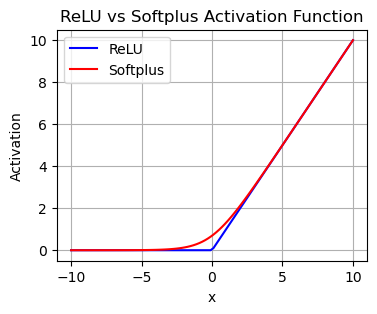

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values
x = np.linspace(-10, 10, 100)

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Define the softplus function
def softplus(x):
    return np.log1p(np.exp(x))

# Plot ReLU and softplus functions
plt.figure(figsize=(4, 3))
plt.plot(x, relu(x), label='ReLU', color='blue')
plt.plot(x, softplus(x), label='Softplus', color='red')

# Add labels and title
plt.xlabel('x')
plt.ylabel('Activation')
plt.title('ReLU vs Softplus Activation Function')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## 4. Custom initializer
####  `Glorot initializer`

The Glorot initializer, also known as Xavier initializer, is a method for initializing the weights of neural network layers. It was proposed by Xavier Glorot and Yoshua Bengio in their paper "Understanding the difficulty of training deep feedforward neural networks".

- The goal of Glorot initialization is to keep the scale of the gradients roughly the same across different layers of the network, which helps to prevent the gradients from vanishing or exploding during training.

- The Glorot initializer initializes the weights of a layer by drawing them from a uniform or normal distribution with zero mean and a variance that depends on the number of input and output units of the layer. The variance is typically calculated as a function of the number of input and output units, which helps in ensuring that the weights are initialized in such a way that the signal from the input layer doesn't vanish or explode as it passes through the network.

## 5. Custom regularizer
####  `ℓ1 Regularization`

 In ℓ1 regularization, the penalty term added to the loss function is the absolute sum of the weights' magnitudes. 
 - It encourages sparsity in the weight vectors, effectively pushing some weights to exactly zero. 
 - This can be useful for feature selection and model simplification.

## 5. Custom constraint
####  `Non negative constraint`

A custom constraint that ensures weights are all positive can be implemented by defining a function that enforces this constraint and using it when defining the weights of a neural network layer. 

In [50]:
## Activation function
def my_softplus(z): 
    """
    Compute the softplus function, which is a smooth approximation of ReLU.
    
    Args:
        z: Input tensor.
    
    Returns:
        Output tensor after applying the softplus function.
    """
    return tf.math.log(tf.exp(z) + 1.0)

## Initializer
def my_glorot_initializer(shape, dtype=tf.float32):
    """
    Initialize weights using Glorot initialization (also known as Xavier initialization).
    
    Args:
        shape: Shape of the weight tensor.
        dtype: Data type of the weights.
    
    Returns:
        Initialized weight tensor.
    """
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

## Regulizer
def my_l1_regularizer(weights):
    """
    Compute the L1 regularization term.
    
    Args:
        weights: Weight tensor.
    
    Returns:
        L1 regularization term.
    """
    return tf.reduce_sum(tf.abs(0.01 * weights))

## Constraint
def my_positive_weights(weights):
    """
    Custom constraint ensuring all weights are positive.
    
    Args:
        weights: Weight tensor.
    
    Returns:
        Weight tensor with negative values replaced by zero.
    """
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

## These custom functions can then be used normally, for example: 
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [51]:
#  Train, and save a neural network model using the Keras API with several custom components:
# - Custom softplus activation function
# - Custom Glorot initializer
# - Custom L1 regularization
# - Custom positive weights constraint


# Clear any previous TensorFlow session to avoid cluttering memory
keras.backend.clear_session()

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the neural network model
model = keras.models.Sequential([
    # First hidden layer with SELU activation and LeCun normal initialization
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    # Output layer with custom softplus activation, L1 regularization, positive weights constraint,
    # and Glorot initialization
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

# Compile the model with Mean Squared Error loss and Nadam optimizer
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

# Train the model on the training data with validation data for 2 epochs
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

# Save the trained model to a file
model.save("my_model_with_many_custom_parts.h5")

# Load the trained model
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })


Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 1.6597 - mae: 0.9039 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 0s 946us/step - loss: 0.6407 - mae: 0.5247 - val_loss: inf - val_mae: inf


**Saving hyperparameters of custom functions**

If a function has hyperparameters that need to be saved along with the model, it's often beneficial to subclass the appropriate class from Keras. Here are the classes you can `subclass` depending on the type of function:

- **Regularizers**: If you have a function that computes a regularization term and it has hyperparameters that need to be saved with the model, subclass `keras.regularizers.Regularizer`. This allows you to define your custom regularization function along with its hyperparameters and ensure they are saved and loaded along with the model.
- **Constraints**: If you have a function that imposes constraints on the model's weights and has hyperparameters, subclass `keras.constraints`.Constraint. This allows you to define your custom constraint function along with its hyperparameters and ensure they are saved and loaded along with the model.
- **Initializers**: If you have a function that initializes the model's weights and has hyperparameters, subclass `keras.initializers.Initializer`. This allows you to define your custom initialization function along with its hyperparameters and ensure they are saved and loaded along with the model.
- **Layers**: If you have a custom layer or activation function that requires hyperparameters to be saved along with the model, subclass `keras.layers.Layer`. This allows you to define your custom layer or activation function with its hyperparameters and ensure they are saved and loaded along with the model.

**Note** that for losses, layers (including activation functions), and models, you must implement the `call()` method. However, for regularizers, initializers, and constraints, you should implement the `__call__()` method. Metrics have a slightly different requirement, as we'll discuss next.

In [52]:
# Define a custom L1 regularizer subclassing keras.regularizers.Regularizer.
# This allows the custom regularization function to be saved and loaded along with the model,
# ensuring consistency in behavior across different instances of the model.

class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        # Initialize the custom L1 regularizer.
        self.factor = factor
    
    def __call__(self, weights):
        # Compute the L1 regularization term.
        return tf.reduce_sum(tf.abs(self.factor * weights))
    
    def get_config(self):
        """
        Get the configuration of the regularizer.
        Returns:
            A dictionary containing the configuration of the regularizer,
            including the value of the hyperparameter factor.
        """
        return {"factor": self.factor}


In [53]:
# Train, and save a neural network model using the Keras API with several custom components:
# - Custom softplus activation function
# - Custom Glorot initializer
# - Custom L1 regularization (Hyperparameters is reserved)
# - Custom positive weights constraint
# It also illustrates how to load the saved model with custom components.

# Clear any previous TensorFlow session to avoid cluttering memory
keras.backend.clear_session()

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the neural network model
model = keras.models.Sequential([
    # First hidden layer with SELU activation and LeCun normal initialization
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    # Output layer with custom softplus activation, custom L1 regularization,
    # positive weights constraint, and Glorot initialization
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

# Compile the model with Mean Squared Error loss and Nadam optimizer
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

# Train the model on the training data with validation data for 2 epochs
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

# Save the trained model to a file
model.save("my_model_with_many_custom_parts.h5")

# Load the saved model with custom components
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 1.9016 - mae: 0.9591 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 0s 984us/step - loss: 0.7036 - mae: 0.5331 - val_loss: inf - val_mae: inf


## 6. Custom Metrics

While both *losses* and *metrics* are used to assess model performance, their roles, characteristics, and requirements differ significantly. Loss functions drive the optimization process during training, requiring differentiability, while evaluation metrics provide interpretable measures of model performance.

1. **Loss Functions:**

- Loss functions, such as cross-entropy for classification tasks or mean squared error for regression tasks, are primarily used during the training phase of a machine learning model. They measure the discrepancy between the predicted outputs of the model and the actual target values.
- Loss functions need to be differentiable (at least in regions where they are evaluated) because they are used to compute gradients during backpropagation, which is essential for updating the model parameters (weights) using gradient descent or its variants.
- While interpretability is not a primary concern for loss functions, they should accurately capture the notion of error between predictions and ground truth to guide the optimization process effectively.

2. **Evaluation Metrics:**

- Evaluation metrics, such as accuracy, precision, recall, F1-score, etc., are used to assess the performance of a trained model.
- They provide interpretable measures of model performance that are often more intuitive for humans to understand.
- Unlike loss functions, evaluation metrics do not need to be differentiable or have non-zero gradients everywhere. Their primary purpose is to offer insights into how well the model is performing on a given task.
- While loss functions are optimized directly during training, evaluation metrics are used to gauge the model's performance on validation or test data and guide decisions such as model selection or hyperparameter tuning.

However, typically, creating a custom metric function mirrors the process of creating a custom loss function. Essentially, we could employ the `Huber loss function` we previously established as a metric without any significant modification.

In [54]:
# Clear any previous TensorFlow session to avoid cluttering memory
keras.backend.clear_session()

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the neural network model
model = keras.models.Sequential([
    # First hidden layer with SELU activation and LeCun normal initialization
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    # Output layer
    keras.layers.Dense(1),
])

# Compile the model with Mean Squared Error loss and Nadam optimizer,
# along with a custom Huber metric with delta parameter set to 2.0
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

# Train the model on the training data for 2 epochs
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 748us/step - loss: 2.5993 - huber_fn: 0.9986
Epoch 2/2
363/363 [==============================] - 0s 722us/step - loss: 0.6789 - huber_fn: 0.2673


**Note**: When you use the same function as both the loss and a metric, you might see slightly different results. This is mainly because of how numbers are stored and handled in computers, which can lead to tiny differences in the final values.

To add to that, when you're working with sample weights (which give more importance to some data points over others), things get a bit more complex:

- The loss that's calculated during training is like an average of all the batch losses seen so far. Each batch loss is the sum of the losses for each data point, divided by the number of data points in that batch.
- The metric, however, is more like a weighted average of all the individual losses, taking into account the sample weights. It's not exactly the same calculation as the loss.

In simple terms, if you do the math, you'll find that the loss is basically the metric multiplied by the average of the sample weights, plus a tiny bit of error due to how computers handle numbers.

In [55]:
# Compile the model with a custom Huber loss function with delta parameter set to 2.0,
# Nadam optimizer, and a custom Huber metric.
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

# Generate random sample weights for each training sample.
sample_weight = np.random.rand(len(y_train))

# Train the model on the scaled training data for 2 epochs with the specified sample weights.
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

# Compare the first epoch's loss computed from history with the product of the first epoch's Huber metric
# and the mean of the sample weights. 
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

Epoch 1/2
363/363 [==============================] - 1s 745us/step - loss: 0.1165 - huber_fn: 0.2359
Epoch 2/2
363/363 [==============================] - 0s 737us/step - loss: 0.1119 - huber_fn: 0.2265


(0.116495780646801, 0.11707140670633844)

### **Streaming metrics**

**Note**: During training, Keras calculates and tracks the mean of metrics for each batch since the start of the epoch. While this is usually fine, it may not always reflect what you need.  

* Consider a binary classifier’s **precision**, for example. The  precision is the number of true positives divided by the number of positive predictions. Suppose the model made five positive predictions in the first batch, four of which were correct: that’s 80% precision. Then suppose the model made three positive predictions in the second batch, but they were all incorrect: that’s 0% precision for the second batch. If you just compute the mean of these two precisions, you
get 40%. But wait a second—that’s not the model’s precision over these
two batches! Indeed, there were a total of four true positives (4 + 0) out of eight positive predictions (5 + 3), so the overall precision is 50%, not
40%.

* What's required is an object like `keras.metrics.Precision` that keeps count of true positives and false positives and computes their ratio accurately.

This is called a **streaming metric** (or *stateful metric*), as it is gradually updated, batch after batch.

In [56]:
# This code snippet demonstrates the usage of the precision metric in Keras.
# It calculates precision for two sets of predictions and labels and retrieves the result.
# Additionally, it showcases how to access the variables associated with the precision metric
# and how to reset its states.

# Creating a precision metric object
precision = keras.metrics.Precision()

# Calculating precision for the first set of predictions and labels
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

# Getting the result of precision calculation
print(precision.result())

# Calculating precision for the second set of predictions and labels
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

# Getting the result of precision calculation
print(precision.result())

# Getting the variables associated with the precision metric
precision.variables

# Resetting the states of the precision metric
precision.reset_states()


tf.Tensor(0.8, shape=(), dtype=float32)
tf.Tensor(0.5, shape=(), dtype=float32)


### **Streaming metrics:** `HuberMetric` class
* A simple example that keeps track of the total Huber loss and the number of instances seen so far. 
* When asked for the result, it returns the ratio, which is simply the mean Huber loss.

In [57]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        """
        Initializes the HuberMetric instance.

        Args:
            threshold (float): Threshold value for the Huber loss function.
            name (str): Name of the metric.
            dtype (tf.dtypes.DType): Data type of the metric result.
        """
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        """
        Updates the state of the metric based on the true and predicted values.

        Args:
            y_true (tf.Tensor): True values.
            y_pred (tf.Tensor): Predicted values.
            sample_weight (tf.Tensor): Optional sample weights.

        """
        metric = self.huber_fn(y_true, y_pred)
        super().update_state(metric, sample_weight)
        
    def get_config(self):
        """
        Returns the configuration of the metric.

        Returns:
            dict: Configuration dictionary.
        """
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}


In [58]:
# Let's check that the `HuberMetric` class works well:

# Clearing any existing Keras sessions to ensure a fresh start
keras.backend.clear_session()

# Setting random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Creating a simple neural network model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

# Compiling the model with a custom Huber loss function and the HuberMetric
model.compile(loss=keras.losses.Huber(2.0), optimizer="nadam", weighted_metrics=[HuberMetric(2.0)])

# Generating sample weights for the training data
sample_weight = np.random.rand(len(y_train))

# Training the model for 2 epochs
history = model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),
                    epochs=2, sample_weight=sample_weight)

# Calculating and printing the loss and metric value for the first epoch
history.history["loss"][0], history.history["HuberMetric"][0] * sample_weight.mean()

# Saving the model with the custom metric to disk
model.save("my_model_with_a_custom_metric_v2.h5")

# Loading the model with the custom metric from disk
model = keras.models.load_model("my_model_with_a_custom_metric_v2.h5",
                                custom_objects={"HuberMetric": HuberMetric})

# Fine-tuning the loaded model for 2 more epochs
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

# Retrieving and printing the threshold value of the last metric in the model
model.metrics[-1].threshold

Epoch 1/2
363/363 [==============================] - 1s 770us/step - loss: 0.4756 - HuberMetric: 0.9585
Epoch 2/2
363/363 [==============================] - 0s 798us/step - loss: 0.1229 - HuberMetric: 0.2476
Epoch 1/2
363/363 [==============================] - 1s 810us/step - loss: 0.2308 - HuberMetric: 0.2308
Epoch 2/2
363/363 [==============================] - 0s 944us/step - loss: 0.2206 - HuberMetric: 0.2206


2.0

## 6. Custom Layers

- When TensorFlow lacks a needed layer or you want to simplify repetitive patterns, you can create custom layers. For example, if your model repeatedly uses layers A, B, C, you could group them into a custom layer D. This makes the model easier to manage.

### *Exponential layer*
* Adding an exponential layer at the output of a regression model can be useful if the values to predict are positive and with very different scales (e.g., 0.001, 10., 10000):

In [59]:
# Define a custom layer using Lambda to apply the exponential function
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

# Apply the exponential_layer to a sample input
exponential_layer([-1., 0., 1.])


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [60]:
# Clear any previous TensorFlow session and set random seeds for reproducibility
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Define and compile the neural network model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer  # Apply the custom exponential layer
])
model.compile(loss="mse", optimizer="sgd")

# Train the model on training data and validate on validation data
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))

# Evaluate the model on test data
model.evaluate(X_test_scaled, y_test)


Epoch 1/5
363/363 [==============================] - 1s 1ms/step - loss: 0.9543 - val_loss: 0.4266
Epoch 2/5
363/363 [==============================] - 0s 877us/step - loss: 0.4196 - val_loss: 0.3605
Epoch 3/5
363/363 [==============================] - 0s 910us/step - loss: 0.3964 - val_loss: 0.3456
Epoch 4/5
363/363 [==============================] - 0s 907us/step - loss: 0.3850 - val_loss: 0.3519
Epoch 5/5
162/162 [==============================] - 0s 605us/step - loss: 0.3591


0.3590782582759857

### *A custom stateful layer*
* A layer that **maintains internal state** during training and inference. 
* This internal state typically includes trainable parameters (weights) that are updated during training based on the input data and optimization algorithm.
* Custom stateful layers are subclasses of `keras.layers.Layer` in TensorFlow/Keras. 
* By creating custom stateful layers, you have more flexibility in defining complex architectures and operations that are not directly available in the standard layer implementations provided by TensorFlow/Keras. This allows you to implement custom behavior, such as specialized activations, custom regularization techniques, or layers with memory.

In [61]:
class MyDense(keras.layers.Layer):
    # Define a custom layer named MyDense, inheriting from keras.layers.Layer

    def __init__(self, units, activation=None, **kwargs):
        # Initialize the custom layer with specified number of neurons and activation function
        super().__init__(**kwargs)
        # Call the constructor of the parent class with any additional keyword arguments
        self.units = units
        # Store the number of units for the layer
        self.activation = keras.activations.get(activation)
        # Retrieve and store the activation function

    def build(self, batch_input_shape):
        # Define the build method, called when the layer is first used
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        # Add a trainable weight variable (kernel = weight matrix) initialized with glorot_normal
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        # Add a trainable bias variable initialized with zeros
        super().build(batch_input_shape)
        # Call the build method of the parent class to finalize the build process

    def call(self, X):
        # Define the call method, which performs the forward pass computation
        return self.activation(X @ self.kernel + self.bias)
        # Compute the output by applying activation to the linear transformation

    def compute_output_shape(self, batch_input_shape):
        # Define the method to compute the output shape based on input shape and units
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])
        # Compute and return the output shape as a TensorShape object

    def get_config(self):
        # Define the method to get the configuration of the layer
        base_config = super().get_config()
        # Get the base configuration from the parent class
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}
        # Return a dictionary containing the layer's configuration


In [62]:
# Using custom dense layers for training

# Clear any previous TensorFlow session and set random seeds for reproducibility
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Define a sequential model with custom dense layers
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),  # Custom dense layer with ReLU activation
    MyDense(1)  # Custom dense layer with no activation specified
])

# Compile the model with mean squared error loss and Nadam optimizer
model.compile(loss="mse", optimizer="nadam")

# Train the model on scaled training data for 2 epochs, validating on validation data
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

# Evaluate the trained model on scaled test data
model.evaluate(X_test_scaled, y_test)

# Save the trained model to a HDF5 file
model.save("my_model_with_a_custom_layer.h5")

# Load the saved model with custom layer from the HDF5 file
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

Epoch 1/2
363/363 [==============================] - 1s 994us/step - loss: 1.3438 - val_loss: 0.7429
Epoch 2/2
162/162 [==============================] - 0s 602us/step - loss: 0.4989


### *A custom layer with a different behavior during training and testing:*
For example, let’s create a layer that adds **Gaussian noise** during training (for *regularization*) but does nothing during testing (Keras has a layer that does the same thing, `keras.layers.GaussianNoise`


In [63]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)  # Initialize the layer
        self.stddev = stddev  # Standard deviation of the Gaussian noise

    def call(self, X, training=None):
        """
        This method defines the layer's computation during the forward pass.

        Parameters:
        - X: Input tensor
        - training: Boolean flag indicating whether the model is in training mode

        Returns:
        - Tensor: Output tensor after adding Gaussian noise if in training mode, otherwise returns the input tensor unchanged
        """
        if training:  # If in training mode
            # Generate Gaussian noise with the same shape as the input tensor
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise  # Add noise to the input tensor
        else:
            return X  # Return the input tensor unchanged if not in training mode

    def compute_output_shape(self, batch_input_shape):
        """
        This method computes the shape of the output tensor based on the shape of the input tensor.

        Parameters:
        - batch_input_shape: Shape of the input tensor

        Returns:
        - Tuple: Shape of the output tensor (same as the input tensor)
        """
        return batch_input_shape  # Return the shape of the input tensor as the shape of the output tensor


In [64]:
# Here's a simple model that uses the custom layer 'AddGaussianNoise'

# Clear any previous TensorFlow session and set random seeds for reproducibility
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Define the model architecture
model = keras.models.Sequential([
    AddGaussianNoise(stddev=1.0),  # Add custom layer to add Gaussian noise to the input
    keras.layers.Dense(30, activation="selu"),  # Dense layer with 30 units and SELU activation
    keras.layers.Dense(1)  # Output layer with 1 unit (for regression)
])

# Compile the model
model.compile(loss="mse", optimizer="nadam")  # Mean Squared Error loss, Nadam optimizer

# Train the model
model.fit(X_train_scaled, y_train, epochs=2,  # Train for 2 epochs
          validation_data=(X_valid_scaled, y_valid))  # Validation data for monitoring performance

# Evaluate the model on the test data
model.evaluate(X_test_scaled, y_test)  # Evaluate the model's performance on the test set


Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 2.7422 - val_loss: 4.6321
Epoch 2/2
162/162 [==============================] - 0s 601us/step - loss: 0.7577


0.757721483707428

## 7. Custom Models
### **Residual block**

- A residual block is a fundamental building block in deep neural networks, particularly in deep convolutional neural networks (**CNNs**). It was introduced as part of the architecture of ResNet (Residual Networks), a type of neural network designed to tackle the problem of **vanishing gradients** in very deep networks.

The concept of a residual block addresses the challenge of training deep networks by introducing skip connections or **shortcuts** that allow gradients to flow more easily during training. Here's how it works:

1. **Main Path:** The input to the residual block goes through a series of convolutional layers, activation functions (like ReLU), and possibly other operations, which transform the input into a higher-level representation.
2. **Shortcut Connection:** A shortcut connection (also called a skip connection or identity mapping) is introduced, which simply passes the input (or a transformed version of it) directly to the output of the block, bypassing the main path.
3. **Merge Operation:** The output of the main path and the shortcut connection are combined element-wise, typically through addition or concatenation. This combined output becomes the output of the residual block.

The key idea behind a residual block is that the output of the block is not merely the result of the main path's transformation but is the sum or concatenation of this transformation and the original input. This allows the network to learn residual functions, i.e., the difference between the input and the desired output, which can be easier to optimize. The skip connections also facilitate the flow of gradients during training, making it easier to train very deep networks.

Residual blocks have been widely adopted in various architectures beyond ResNet due to their effectiveness in training deep neural networks. They enable the construction of deeper networks with better performance and faster convergence.


### *A model with residual block*


Suppose you want to build the model represented in Figure. The inputs go through a first dense layer, then through a residual block composed of two dense layers and an addition operation (a residual block adds its inputs to its outputs), then through this same residual block three more times, then through a second residualblock, and the final result goes through a dense output layer. Note that this model does not make much sense; it’s just an example to illustrate the fact that you can easily build any kind of model you want, even one that contains loops and skip connections. 

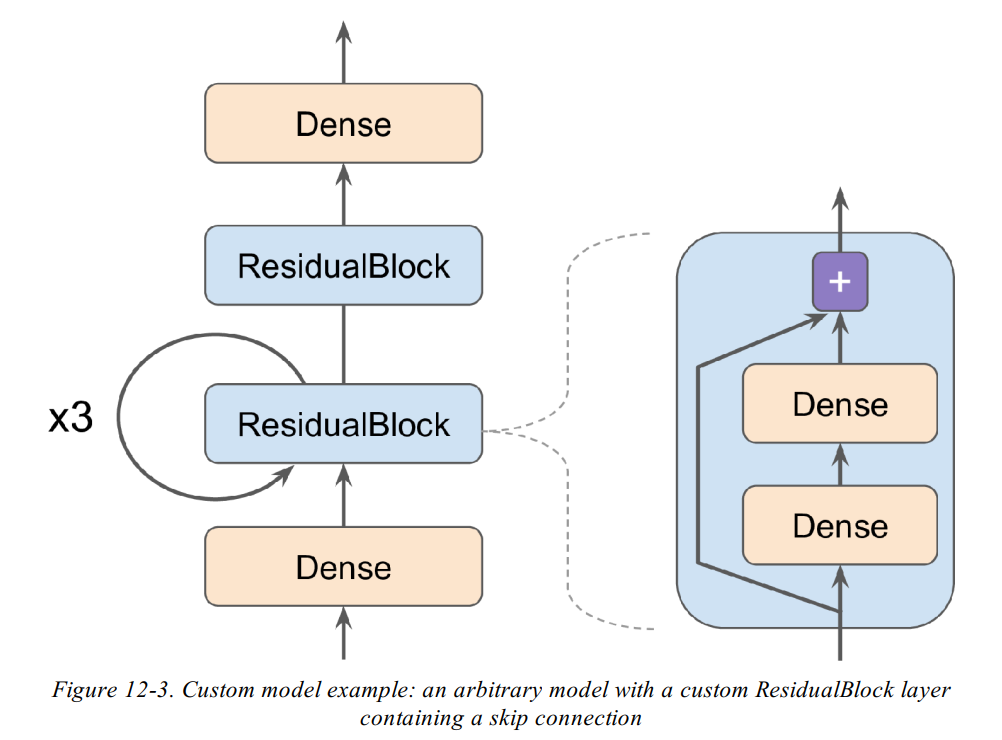

In [65]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        """
        Initialize the ResidualBlock layer.

        Parameters:
        - n_layers: Number of dense layers in the block.
        - n_neurons: Number of neurons in each dense layer.
        - **kwargs: Additional arguments to pass to the parent class constructor.
        """
        super().__init__(**kwargs)  # Initialize the parent class
        # Create a list of dense layers with specified number of neurons and ELU activation
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        """
        Perform the forward pass computation of the ResidualBlock layer.

        Parameters:
        - inputs: Input tensor to the layer.

        Returns:
        - Tensor: Output tensor after passing through the residual block.
        """
        Z = inputs  # Initialize Z to the input tensor
        # Pass the input tensor through each dense layer in the block
        for layer in self.hidden:
            Z = layer(Z)
        # Add the original input tensor to the output of the dense layers (residual connection)
        return inputs + Z  # Return the output tensor


In [66]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        """
        Initialize the ResidualRegressor model.

        Parameters:
        - output_dim: Dimensionality of the output.
        - **kwargs: Additional arguments to pass to the parent class constructor.
        """
        super().__init__(**kwargs)  # Initialize the parent class
        # Define layers and blocks of the model
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")  # First dense layer
        self.block1 = ResidualBlock(2, 30)  # First residual block
        self.block2 = ResidualBlock(2, 30)  # Second residual block
        self.out = keras.layers.Dense(output_dim)  # Output layer

    def call(self, inputs):
        """
        Perform the forward pass computation of the ResidualRegressor model.

        Parameters:
        - inputs: Input tensor to the model.

        Returns:
        - Tensor: Output tensor after passing through the model.
        """
        Z = self.hidden1(inputs)  # Pass inputs through the first dense layer
        for _ in range(1 + 3):  # Loop through the range of 1 + 3 times
            Z = self.block1(Z)  # Pass through the first residual block
        Z = self.block2(Z)  # Pass through the second residual block
        return self.out(Z)  # Pass the final output of the second block through the output layer


In [67]:
# Clear any previous TensorFlow session and set random seeds for reproducibility
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Set X_new_scaled to X_test_scaled
X_new_scaled = X_test_scaled

# Create an instance of ResidualRegressor model
model = ResidualRegressor(1)

# Compile the model with Mean Squared Error (MSE) loss and Nadam optimizer
model.compile(loss="mse", optimizer="nadam")

# Train the model on the training data for 5 epochs and store training history
history = model.fit(X_train_scaled, y_train, epochs=5)

# Evaluate the model's performance on the test data and store the score
score = model.evaluate(X_test_scaled, y_test)

# Generate predictions on the new scaled data using the trained model
y_pred = model.predict(X_new_scaled)

# Save the trained model to a file named "my_custom_model.ckpt"
model.save("my_custom_model.ckpt")

# Load the saved model from the file "my_custom_model.ckpt"
model = keras.models.load_model("my_custom_model.ckpt")

# Continue training the loaded model on the training data for additional 5 epochs
history = model.fit(X_train_scaled, y_train, epochs=5)


Epoch 1/5
363/363 [==============================] - 2s 2ms/step - loss: 32.7400
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 2.3512
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 1.7761
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 1.5275
Epoch 5/5
162/162 [==============================] - 0s 1ms/step


INFO:tensorflow:Assets written to: my_custom_model.ckpt\assets


INFO:tensorflow:Assets written to: my_custom_model.ckpt\assets


Epoch 1/5
363/363 [==============================] - 2s 2ms/step - loss: 0.8960
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 1.1050
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5988
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3905
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4454


In [68]:
# Training a model with residual block using the sequential API

# Clear any previous TensorFlow session and set random seeds for reproducibility
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Define a ResidualBlock instance with 2 layers and 30 neurons
block1 = ResidualBlock(2, 30)

# Define the model using the sequential API
model = keras.models.Sequential([
    # Add the first dense layer with ELU activation and He normal initialization
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    # Add four instances of block1 (residual block)
    block1, block1, block1, block1,
    # Add another residual block with 2 layers and 30 neurons
    ResidualBlock(2, 30),
    # Add the output layer with one neuron
    keras.layers.Dense(1)
])

# Compile the model with Mean Squared Error (MSE) loss and Nadam optimizer
model.compile(loss="mse", optimizer="nadam")

# Train the model on the training data for 5 epochs and store training history
history = model.fit(X_train_scaled, y_train, epochs=5)

# Evaluate the model's performance on the test data and store the score
score = model.evaluate(X_test_scaled, y_test)

# Generate predictions on the new scaled data using the trained model
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 1s 1ms/step - loss: 1.4815
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 0.8759
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5189
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 0.4345
Epoch 5/5
162/162 [==============================] - 0s 895us/step
